<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Seminario_ML/blob/main/2_Aprendizaje_No_Supervisado/2_Agrupamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align = 'center'> Agrupamiento (clustering) </h1>

El clustering en Machine Learning es una técnica fundamental que se utiliza para identificar estructuras subyacentes dentro de conjuntos de datos no etiquetados. A diferencia del aprendizaje supervisado, donde se tienen etiquetas predefinidas para entrenar un modelo, el clustering busca agrupar datos similares en clusters o grupos, sin necesidad de etiquetas previas. Este enfoque es ampliamente utilizado en diversas aplicaciones, como segmentación de clientes, análisis de redes sociales, clasificación de documentos y reconocimiento de patrones en imágenes, entre otros. En esencia, el clustering busca descubrir la estructura oculta dentro de los datos, lo que puede proporcionar insights valiosos para la toma de decisiones y la comprensión de fenómenos complejos.

<img src='img/clustering.jpeg'>

<h2> K - Medias </h2>

El algoritmo K-Medias es uno de los métodos de clustering más populares en Machine Learning. Su objetivo principal es dividir un conjunto de datos en K grupos distintos, donde cada punto de datos pertenece al grupo cuyo centroide (o centro de masa) está más cercano. La idea central del algoritmo es asignar iterativamente puntos de datos a los clusters más cercanos y luego actualizar los centroides de los clusters en función de los puntos asignados. Este proceso se repite hasta que se alcanza la convergencia, es decir, cuando los centroides de los clusters ya no cambian significativamente entre iteraciones. K-Medias es eficiente y fácil de implementar, pero su rendimiento puede depender fuertemente de la elección inicial de los centroides y la métrica de distancia utilizada. A pesar de sus limitaciones, K-Medias sigue siendo ampliamente utilizado en aplicaciones de clustering debido a su simplicidad y escalabilidad.

<h3> Pseudo - algoritmo </h3>

1. Escogemos el número de grupos (clústers), $K$, e inicializamos los $K$ centroides de forma aleatoria.

2. Asignamos cada punto $i$ al grupo $k$ cuyo centroide es el más cercano.

2. Calculamos la inercia de las agrupaciones dada por:

$$J(K) =  \sum_{i = 1}^{N} \sum_{k = 1}^{K} \vert \vert x_{ij} - \mu_{k} \vert \vert  ^{2} $$

3. Inicializamos los centroides de acuerdo a la asignación resultante del punto 2

4. Repetimos 2 y 3 hasta que $J$ alcance su mínimo local (haya convergencia)

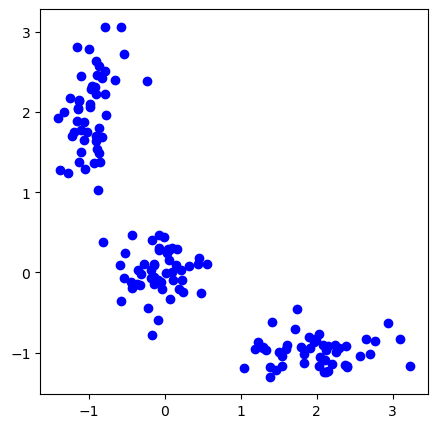

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Let's begin by allocation 3 cluster's points
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

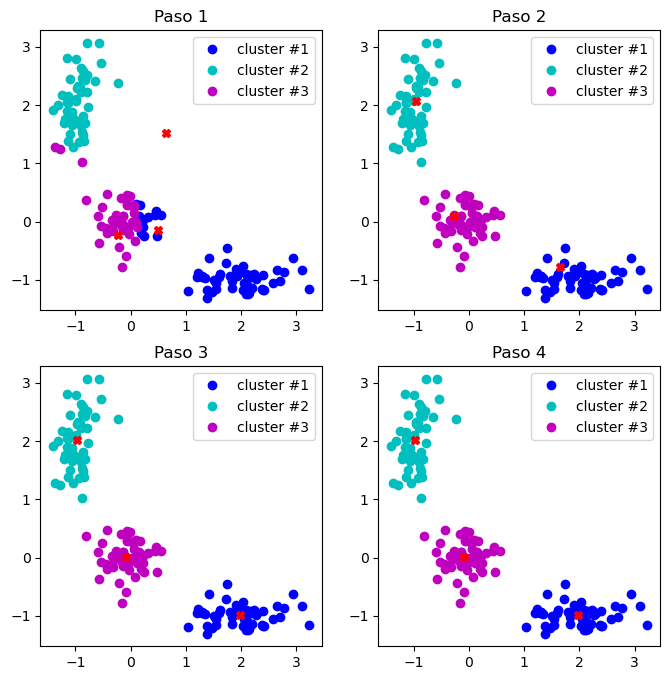

In [2]:
# Scipy has function that takes 2 tuples and return
# calculated distance between them
from scipy.spatial.distance import cdist


# Scipy has function that takes 2 tuples and return
# calculated distance between them
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)

    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)
    
# Let's plot K-means
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Paso {:}'.format(i + 1))

Como se explicó anteriormente, el número de grupos, $K$, es dado por el usuario, así que, ¿cómo escogemos este valor? Para esto, calculamos la inercia mínima para cada número de grupos y escogemos una cantidad tal que la inercia disminuya con menor velocidad cuándo incrementamos en $1$ el número de clústers. Esto se hacer por medio de

$$\min_{k} D(K) = \frac{J(K) - J(K + 1)}{J(K - 1) - J(K)}$$

La técnica más famosa que se utiliza para encontrar el $k$ óptimo se conoce como *la prueba del codo*, que corresponde al siguiente gráfico:

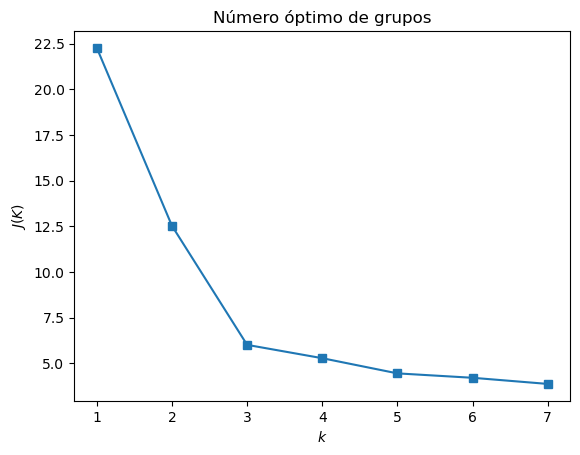

In [3]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(K)$')
plt.title('Número óptimo de grupos');

<h2> Ejemplo 1 </h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [5]:
iris = load_iris()
x = iris['data']

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

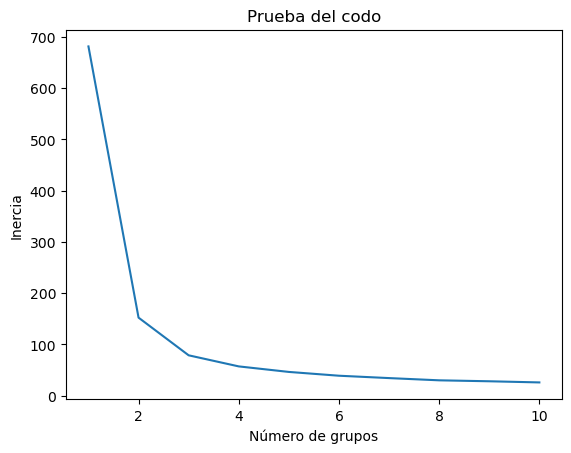

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('Prueba del codo')
plt.xlabel('Número de grupos')
plt.ylabel('Inercia') #within cluster sum of squares
plt.show()

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

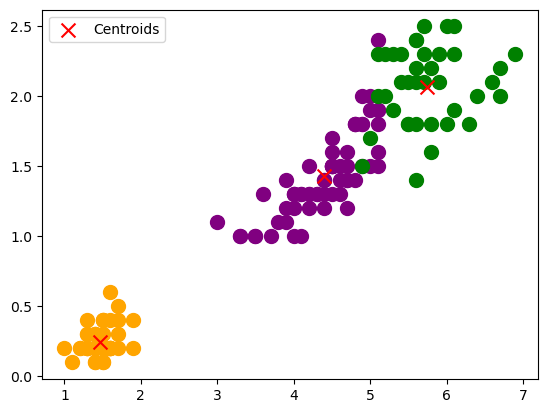

In [9]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], s = 100, c = 'purple')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], s = 100, c = 'orange')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], s = 100, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 100, marker='x',c = 'red', label = 'Centroids')

plt.legend()

<h3> Ejemplo 3 </h3>

In [10]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

In [11]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


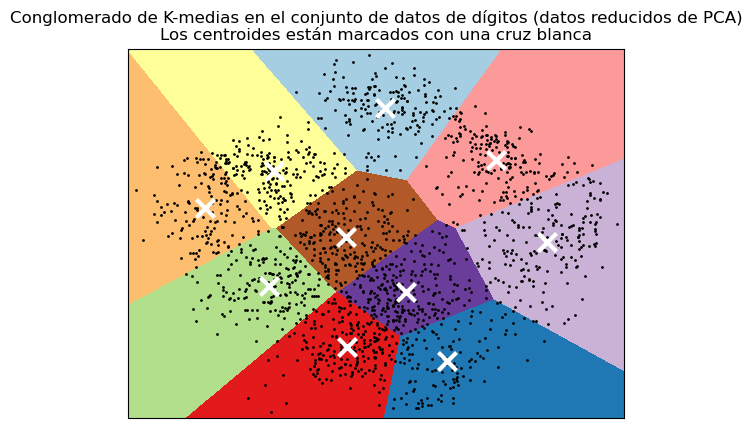

In [12]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "Conglomerado de K-medias en el conjunto de datos de dígitos (datos reducidos de PCA)\n"
    "Los centroides están marcados con una cruz blanca"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [13]:
y = kmeans.predict(reduced_data)

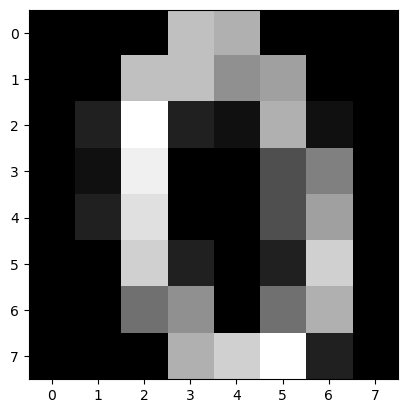

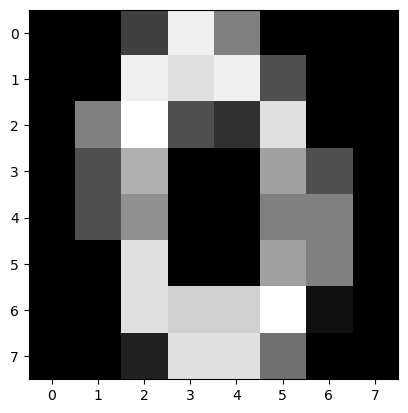

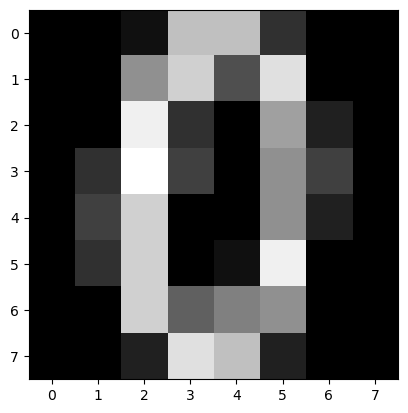

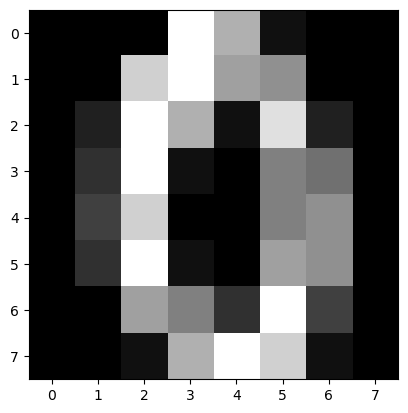

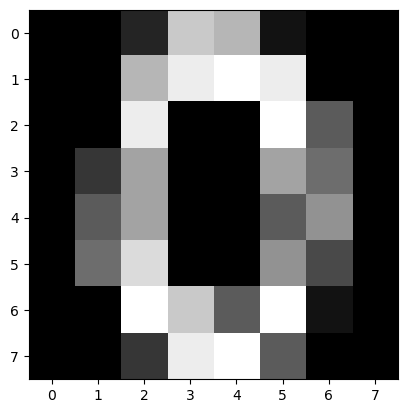

In [14]:
subset_0 = pd.DataFrame(data[y==0]).sample(5)

for data_point in subset_0.iterrows():
    img = data_point[1].to_numpy().reshape(8, 8)
    plt.imshow(img, cmap='gray')
    plt.show()